# Data Directory Preparation
## For Keras ImageDataGenerator's flow_from_directory method 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
base_dir = "X:/train-scene classification/"
orig_train_dir = "X:/train-scene classification/train/"

### Test image extraction

In [3]:
test_list_df = pd.read_csv(os.path.join(base_dir, 'test_images.csv'))
print(test_list_df.head())

  image_name
0      3.jpg
1      5.jpg
2      6.jpg
3     11.jpg
4     14.jpg


In [4]:
test_list = test_list_df.image_name.values
print(test_list[:10])

['3.jpg' '5.jpg' '6.jpg' '11.jpg' '14.jpg' '22.jpg' '25.jpg' '28.jpg'
 '30.jpg' '38.jpg']


360.jpg


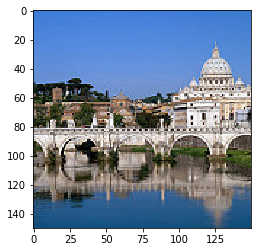

In [9]:
for i, im in enumerate(test_list):
    img = cv2.imread(os.path.join(orig_train_dir, im))
    if i == 101:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        print(im)
    cv2.imwrite(os.path.join(base_dir, 'data', 'test', im), img)

### Validation image extraction

In [12]:
train_list_df = pd.read_csv(os.path.join(base_dir, 'train.csv'))
print(train_list_df.head())

  image_name  label
0      0.jpg      0
1      1.jpg      4
2      2.jpg      5
3      4.jpg      0
4      7.jpg      4


In [18]:
train_list = train_list_df.image_name.values
# print(train_list[:10])
print(type(train_list))
train_list = train_list.tolist()
print(train_list[:10])
print(type(train_list))

<class 'numpy.ndarray'>
['0.jpg', '1.jpg', '2.jpg', '4.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '12.jpg', '13.jpg']
<class 'list'>


In [23]:
import random
random.seed(42)

valid_list = random.sample(train_list, 650)

print(valid_list[:20])
print(valid_list[-20:])
print(len(valid_list))
print(type(valid_list))

['5248.jpg', '1184.jpg', '12807.jpg', '11442.jpg', '10464.jpg', '6541.jpg', '4863.jpg', '4017.jpg', '19760.jpg', '1502.jpg', '1410.jpg', '4383.jpg', '10250.jpg', '10886.jpg', '23655.jpg', '1252.jpg', '9334.jpg', '19635.jpg', '10330.jpg', '21027.jpg']
['8683.jpg', '8974.jpg', '10146.jpg', '22667.jpg', '12885.jpg', '13206.jpg', '4771.jpg', '9096.jpg', '13839.jpg', '10648.jpg', '16870.jpg', '8419.jpg', '14123.jpg', '675.jpg', '5939.jpg', '12773.jpg', '2121.jpg', '2546.jpg', '13654.jpg', '5925.jpg']
650
<class 'list'>


In [29]:
valid_list_df = pd.DataFrame(np.array(valid_list), columns = ['image_name'])
print(valid_list_df.head())
print(valid_list_df.tail())
valid_list_df.to_csv(os.path.join(base_dir, 'valid_images.csv'), index = False)

  image_name
0   5248.jpg
1   1184.jpg
2  12807.jpg
3  11442.jpg
4  10464.jpg
    image_name
645  12773.jpg
646   2121.jpg
647   2546.jpg
648  13654.jpg
649   5925.jpg


In [30]:
import pickle

with open('valid_list.pickle', 'wb') as handle:
    pickle.dump(valid_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
print(valid_list[:20])
print(valid_list[-20:])
print(len(valid_list))
print(type(valid_list))

['5248.jpg', '1184.jpg', '12807.jpg', '11442.jpg', '10464.jpg', '6541.jpg', '4863.jpg', '4017.jpg', '19760.jpg', '1502.jpg', '1410.jpg', '4383.jpg', '10250.jpg', '10886.jpg', '23655.jpg', '1252.jpg', '9334.jpg', '19635.jpg', '10330.jpg', '21027.jpg']
['8683.jpg', '8974.jpg', '10146.jpg', '22667.jpg', '12885.jpg', '13206.jpg', '4771.jpg', '9096.jpg', '13839.jpg', '10648.jpg', '16870.jpg', '8419.jpg', '14123.jpg', '675.jpg', '5939.jpg', '12773.jpg', '2121.jpg', '2546.jpg', '13654.jpg', '5925.jpg']
650
<class 'list'>


In [34]:
diff = lambda l1, l2: [x for x in l1 if x not in l2]

train_img_list = diff(train_list, valid_list)

print(train_img_list[:10])
print(len(train_img_list))

['0.jpg', '1.jpg', '2.jpg', '4.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '12.jpg', '13.jpg']
16384


In [36]:
train_img_list_df = pd.DataFrame(np.array(train_img_list), columns = ['image_name'])
print(train_img_list_df.head())
print(train_img_list_df.tail())
train_img_list_df.to_csv(os.path.join(base_dir, 'training_images_list.csv'), index = False)

  image_name
0      0.jpg
1      1.jpg
2      2.jpg
3      4.jpg
4      7.jpg
      image_name
16379  24325.jpg
16380  24328.jpg
16381  24329.jpg
16382  24332.jpg
16383  24334.jpg


In [37]:
with open('train_img_list.pickle', 'wb') as handle:
    pickle.dump(train_img_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [38]:
print(train_list_df.head())

  image_name  label
0      0.jpg      0
1      1.jpg      4
2      2.jpg      5
3      4.jpg      0
4      7.jpg      4


In [48]:
print(train_list_df.index)
#train_list_df.set_index(keys=u'image_name', drop=True, append=False, inplace=True, verify_integrity=False)
print(train_list_df.head())

Index(['0.jpg', '1.jpg', '2.jpg', '4.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg',
       '12.jpg', '13.jpg',
       ...
       '24320.jpg', '24321.jpg', '24322.jpg', '24323.jpg', '24324.jpg',
       '24325.jpg', '24328.jpg', '24329.jpg', '24332.jpg', '24334.jpg'],
      dtype='object', name='image_name', length=17034)
            label
image_name       
0.jpg           0
1.jpg           4
2.jpg           5
4.jpg           0
7.jpg           4


In [58]:
"""Sanity Check"""
testing = pd.read_csv(os.path.join(base_dir, 'train.csv'))
for i, v in enumerate(train_list_df.label.values):
    assert(testing.label[i] == v)
    if i == 3:
        print(testing.label[i], v)
"""------------"""

0 0


In [60]:
print(type(train_list_df.loc['4.jpg', 'label']))

<class 'numpy.int64'>


In [65]:
def get_save_path(im, label, mode):
    if mode == 'train':
        save_folder = os.path.join(base_dir, 'data', 'train')
    elif mode == 'valid':
        save_folder = os.path.join(base_dir, 'data', 'valid')
    else:
        assert(False)
    
    if label == 0:
        res = os.path.join(save_folder, '0_buildings', im)
    elif label == 1:
        res = os.path.join(save_folder, '1_forest', im)
    elif label == 2:
        res = os.path.join(save_folder, '2_glacier', im)
    elif label == 3:
        res = os.path.join(save_folder, '3_mountain', im)
    elif label == 4:
        res = os.path.join(save_folder, '4_sea', im)
    elif label == 5:
        res = os.path.join(save_folder, '5_street', im)
    
    return res

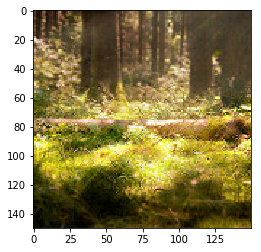

In [66]:
for i, im in enumerate(valid_list):
    img = cv2.imread(os.path.join(orig_train_dir, im))
    if i == 21:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    curr_label = train_list_df.loc[im, 'label']
    cv2.imwrite(get_save_path(im, curr_label, mode='valid'), img)

### Train image extraction

In [67]:
print(train_img_list[:10])
print(len(train_img_list))

['0.jpg', '1.jpg', '2.jpg', '4.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '12.jpg', '13.jpg']
16384


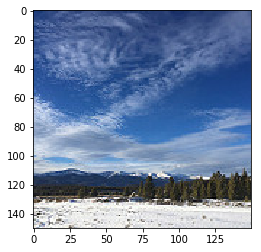

In [68]:
for i, im in enumerate(train_img_list):
    img = cv2.imread(os.path.join(orig_train_dir, im))
    if i == 21:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    curr_label = train_list_df.loc[im, 'label']
    cv2.imwrite(get_save_path(im, curr_label, mode = 'train'), img)

## Done!